In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as sgr

In [2]:
data = pd.read_csv("results.csv", index_col=0)
data['host'] = 'rapi'
data['watts'] = 2.5*5
more_data = pd.read_csv("tempresults.csv", index_col=0)
more_data['host'] = 'laptop'
more_data['watts'] = 28.86
data = pd.concat([data, more_data[6:]])
data['Ws'] = data['watts']*data['time']
data.groupby(['host','pi_count'])['Ws'].describe()

count         mean         std          min          25%  \
host   pi_count                                                             
laptop 1           3.0  1147.275796   14.011544  1137.500502  1139.249498   
rapi   1           3.0  9612.120856  151.508516  9520.012996  9524.689044   
       2           3.0  4892.434974  156.513858  4711.708406  4847.185612   
       3           3.0  4056.032765   82.315530  3968.459803  4018.138909   
       4           3.0  3759.515159   82.583119  3665.627903  3728.817371   
       5           3.0  1994.721938   56.754714  1932.155764  1970.636418   

                         50%          75%          max  
host   pi_count                                         
laptop 1         1140.998495  1152.163443  1163.328392  
rapi   1         9529.365093  9658.174786  9786.984479  
       2         4982.662818  4982.798257  4982.933697  
       3         4067.818016  4099.819246  4131.820476  
       4         3792.006838  3806.458788  3820.910737  
       5         2009.117073  2026.005025  2042.892978

In [3]:
mod = smf.ols(formula='Ws ~ host:pi_count', data=data)
res = mod.fit()
res.summary()

/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ws   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     48.65
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           2.77e-07
Time:                        19:37:54   Log-Likelihood:                -149.73
No. Observations:                  18   AIC:                             305.5
Df Residuals:                      15   BIC:                             308.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              9773.2804    657.978     14.853      0.000    8370.833    1.12e+04
host[laptop]:pi_count -8626.0046    909.128     -9.488      0.000   -1.06e+04   -6688.244
host[rapi]:pi_count   -1636.7718    198.388     -8.250      0.000   -2059.626   -1213.918
==============================================================================
Omnibus:                        0.703   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.690
Skew:                          -0.215   Prob(JB):                        0.708
Kurtosis:                       2.143   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0, 10219.47132546336)

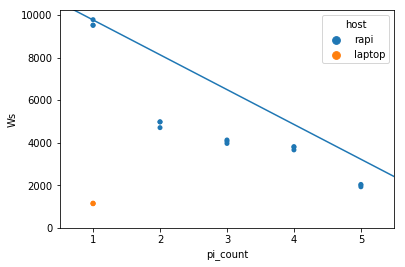

In [9]:
fig, ax = plt.subplots()
sgr.abline_plot(slope=res.params['host[rapi]:pi_count'], intercept=res.params['Intercept'], ax=ax)
sns.stripplot(x='pi_count', y='Ws', hue='host', data=data, ax=ax)
ax.set_ylim(bottom=0)